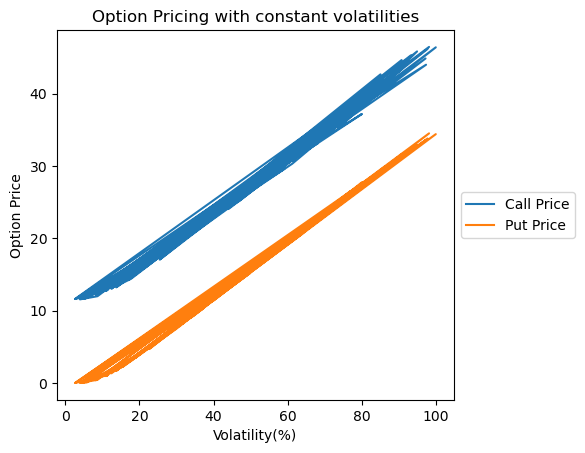

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
'''
First, we generate N many prices by using the formula given above.
Second, we take the payoffs of prices wrt strike prices and take average payoffs.
Third, we plot the option prices after generating random volatilities.
    We see that the more volatility is, the more higher option price is.
'''
def generate_underlying_prices(Param,S0,N,T):
    W = np.sqrt(T)*np.random.standard_normal(N)
    return S0*np.exp(T*(Param['InterestRate']-0.5*Param['Volatility']**2)
+ Param['Volatility']*W);

def call_and_put_payoffs(S_t,Strike):
    return np.maximum(S_t-Strike,0), np.maximum(Strike-S_t,0);

def european(Param,S0,T,Strike,N=10000):
    S_T = generate_underlying_prices(Param,S0,N,T)
    Ct_payoffs,Pt_payoffs = call_and_put_payoffs(S_T,Strike)
    Call_P = sum(Ct_payoffs)/N; Put_P = sum(Pt_payoffs)/N
    return Call_P,Put_P;

def plotPrices(Param):
    vols,calls,puts = [],[],[]
    for i in range(100):
        volatility = rnd.random()
        while(volatility in vols):
            volatility = rnd.random()          
        Param['Volatility'] = volatility
        Price_C, Price_P = european(Param, S0=100, T=1.0, Strike=100);   
        vols.append(volatility); calls.append(Price_C); puts.append(Price_P);
    ax = plt.subplot(111)
    line, = ax.plot(np.array(vols)*100,calls, label='Call Price')
    line, = ax.plot(np.array(vols)*100,puts, label='Put Price')
    plt.title('Option Pricing with constant volatilities')
    plt.ylabel('Option Price')
    plt.xlabel('Volatility(%)')
    
# Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
Param = {'Volatility': 0.25, 'InterestRate': 0.11}
plotPrices(Param);

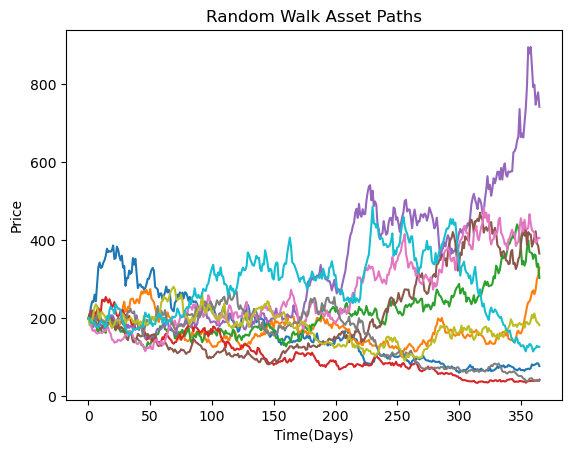

In [121]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
'''
In this block, we generate random daily returns 
Then we use daily_returns to generate random walk of stock values. 
''' 
#Define Variables
T = 365 #Number of trading days 
mu = 0.09 #Return
vol = 0.9 #Volatility
 
daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
 
price_list = [200]
for i in range(10):
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    plt.plot(price_list)
    price_list[:] =[200]
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
plt.title('Random Walk Asset Paths')
plt.ylabel('Price')
plt.xlabel('Time(Days)')    
plt.show()

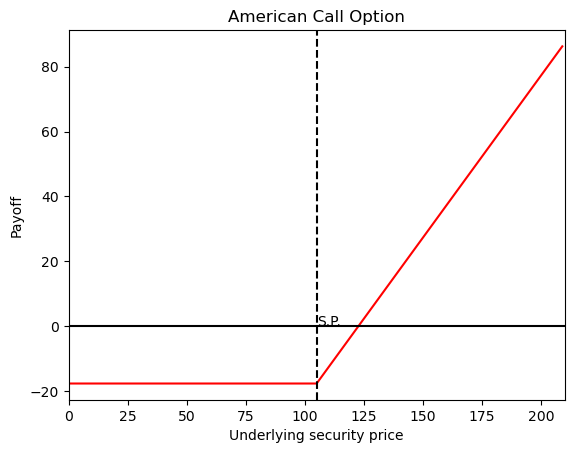

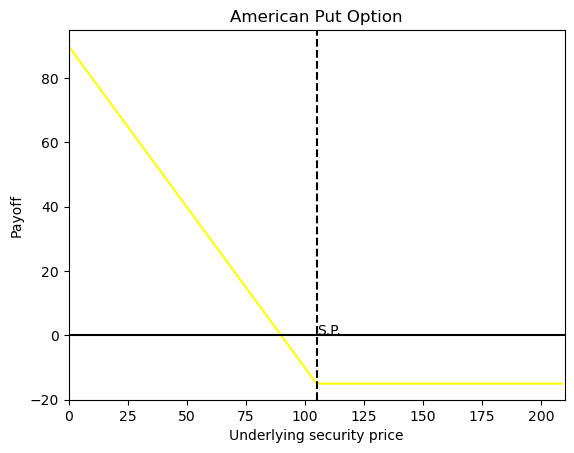

In [103]:
import matplotlib.patches as mpatches

def BinomialOption(S0, K, r, sigma, T, N=10):   
    '''
    S0: Initial value of security
    K: Strike Price
    r: Risk-free interest rate
    sigma: Underlying volatility
    T: Expiration date
    '''
    #calculate delta T    
    dT = float(T) / N
 
    # up and down factors
    u = np.exp(sigma * np.sqrt(dT))
    d = 1.0 / u
 
    #init array
    callPrices =  np.asarray([0.0 for i in range(N + 1)])
    putPrices =  np.asarray([0.0 for i in range(N + 1)])

        
    #security price array
    sec = np.asarray([(S0 * u**j * d**(N - j)) for j in range(N + 1)])
    
 
    #The probability of up and down.
    p = (np.exp(r * dT) - d)/ (u - d)
    q = 1.0 - p
 
   
    # Compute the leaves
    callPrices[:] = np.maximum(sec-K, 0.0)
    putPrices[:] = np.maximum(K-sec, 0.0)
    
   
    #calculate backward the option prices
    for i in range(N-1, -1, -1):
        callPrices[:-1]=np.exp(-r * dT) * (p * callPrices[1:] + q * callPrices[:-1])
        putPrices[:-1]=np.exp(-r * dT) * (p * putPrices[1:] + q * putPrices[:-1])
        sec[:]=sec[:]*u
      
        
        callPrices[:]=np.maximum(callPrices[:],sec[:]-K)
        putPrices[:]=np.maximum(putPrices[:],K-sec[:])
                
    # option price
    return callPrices[0],putPrices[0]

def plotAmericanOptions(S,K,r,v,T):
    [Call,Put]=BinomialOption(100,105,0.09,0.4,T)
    # Call Price Plot
    Y = [-Call] * (K)
    Y += [X - Call for X in range(K)] 
    plt.plot(range(2*K), Y, color='red')
    plt.axis([0, 2*K, min(Y) - 5, max(Y) + 5])
    plt.xlabel('Underlying security price')
    plt.ylabel('Payoff')
    plt.axvline(x=K, linestyle='--', color='black')
    plt.axhline(y=0, color='black')
    plt.title('American Call Option')
    plt.text(K, 0, 'S.P.')
    plt.show()
    # Put Price Plot
    Y2 = [-X + K - Put for X in range(K)] 
    Y2 += [-Put] * (K)
    plt.plot(range(2*K), Y2, color='yellow')
    plt.axis([0, 2*K, min(Y2) - 5, max(Y2) + 5])
    plt.xlabel('Underlying security price')
    plt.ylabel('Payoff')
    plt.axvline(x=K, linestyle='--', color='black')
    plt.axhline(y=0, color='black')
    plt.title('American Put Option')
    plt.text(K, 0, 'S.P.')
    plt.show()

plotAmericanOptions(100,105,0.06,0.4,1); 

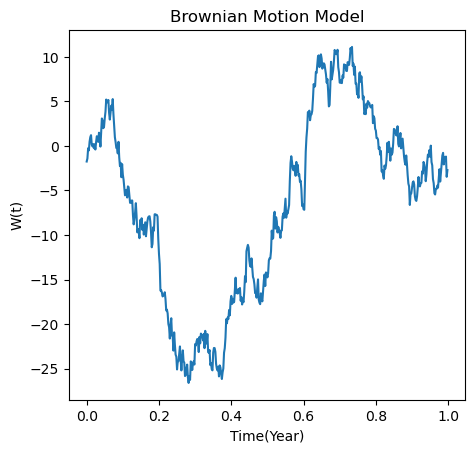

In [120]:
def plotBrownianMotion(N,T):
    #Random seed number
    np.random.seed(100)
    #dw amount of difference btw W(t+1) - W(t)
    dW = np.sqrt(T)*np.random.standard_normal(N)
    #We are vectorizing for efficiency   
    W = np.cumsum(dW)
    ax = plt.subplot(111)
    line, = ax.plot(np.arange(0,T,T/N),W)
    plt.title('Brownian Motion Model')
    plt.ylabel('W(t)')
    plt.xlabel('Time(Year)')
    
# Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.show()

plotBrownianMotion(500,1)    

In [115]:
from scipy.stats import norm
import datetime
import numpy as np
import matplotlib.pyplot as plt
'''
In this block we try to find a implied volatility for a given option.
Our naive approach is to use Newton-Raphson method.
We start by taking sigma as 0.5 and try to approximate to underlying security price of today.
'''
def find_vol(target_value, call_put, S, K, T, r):
    MAX_IT= 500
    EPSILON = 0.000001

    sigma = 0.5
    for i in range(0, MAX_IT):
        price = bs_price(call_put, S, K, T, r, sigma)
        vega = bs_vega(call_put, S, K, T, r, sigma)
        diff = target_value - price  
        if (abs(diff) < EPSILON):
            return sigma
        sigma = sigma + diff/vega # f(x) / f'(x)
    # value wasn't found, return best guess so far
    return sigma

n = norm.pdf
N = norm.cdf

def bs_price(cp_flag,S,K,T,r,v,q=0.0):
    d1 = (np.log(S/K)+(r+v*v/2.)*T)/(v*np.sqrt(T))
    d2 = d1-v*np.sqrt(T)
    if cp_flag == 'c':
        price = S*np.exp(-q*T)*N(d1)-K*np.exp(-r*T)*N(d2)
    else:
        price = K*np.exp(-r*T)*N(-d2)-S*np.exp(-q*T)*N(-d1)
    return price

def bs_vega(cp_flag,S,K,T,r,v,q=0.0):
    d1 = (np.log(S/K)+(r+v*v/2.)*T)/(v*np.sqrt(T))
    return S * np.sqrt(T)*n(d1)

Implied vol: 89.55%
Implied vol: 99.37%
Implied vol: nan%


/var/folders/h2/zvz3b8hn7pg9cmsfp4bt_cgc0000gp/T/ipykernel_17809/2417993341.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  sigma = sigma + diff/vega # f(x) / f'(x)
/var/folders/h2/zvz3b8hn7pg9cmsfp4bt_cgc0000gp/T/ipykernel_17809/2417993341.py:29: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K)+(r+v*v/2.)*T)/(v*np.sqrt(T))
/var/folders/h2/zvz3b8hn7pg9cmsfp4bt_cgc0000gp/T/ipykernel_17809/2417993341.py:38: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K)+(r+v*v/2.)*T)/(v*np.sqrt(T))


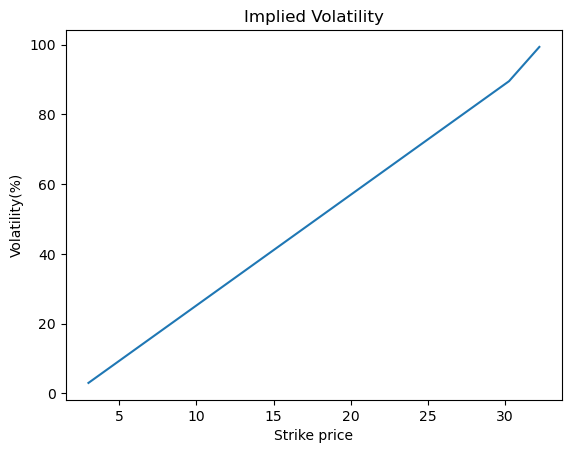

In [123]:
'''
Here, we plot the implied volatilites wrt Strike Prices by using functions written above.
'''
V_market = 1.52
K = 20
T = (datetime.date(2017,3,12) - datetime.date(2017,1,1)).days / 365.
S = 23
r = 0.05
cp = 'c' # call option
vols = [3]
strikes = [3]
for i in range(3):
    K = np.random.uniform(K,45)
    implied_vol = find_vol(V_market, cp, S, K, T, r)
    vols.append(implied_vol*100)
    print ('Implied vol: %.2f%%' % (implied_vol * 100))
    #print(K)
    strikes.append(K)
    
plt.plot(strikes,vols)
plt.title('Implied Volatility')
plt.ylabel('Volatility(%)')
plt.xlabel('Strike price')
plt.show()